In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum07/data/college.csv')

# Cetak header data (5 baris pertama) dari file
display(df.head())

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [4]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


Data Preprocessing

In [5]:
#cek missing value
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [6]:
#cek duplicate
df.duplicated().sum()

#menghapus data duplikat
df = df.drop_duplicates()

#cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

Data Understanding (Exploratory Data Analysis)

        StudentID  Parent_income           IQ
count  8000.00000    8000.000000  8000.000000
mean   4000.50000   40584.017500    99.577750
std    2309.54541   18031.506468    18.923655
min       1.00000    4500.000000    60.000000
25%    2000.75000   29400.000000    90.000000
50%    4000.50000   39330.000000   100.000000
75%    6000.25000   51592.500000   110.000000
max    8000.00000   82390.000000   140.000000


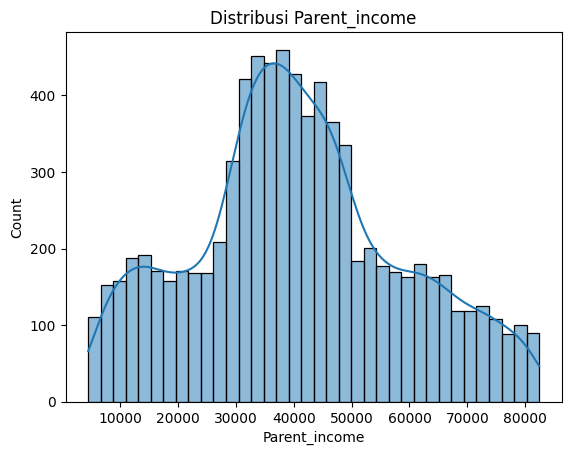

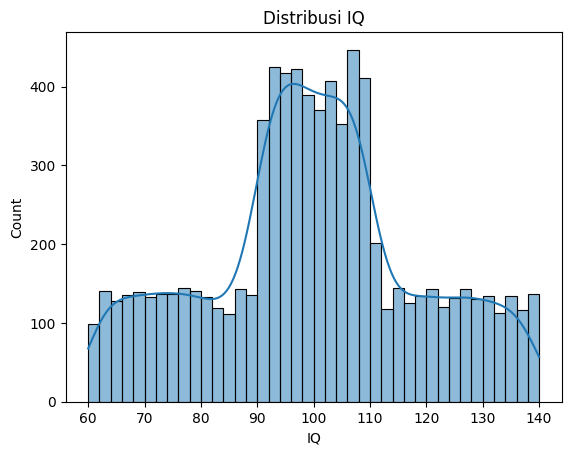

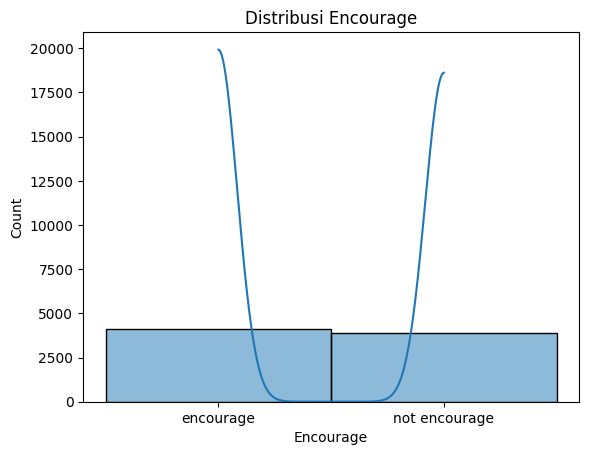

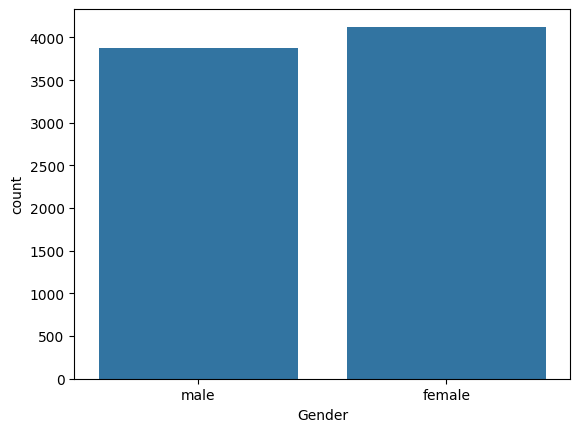

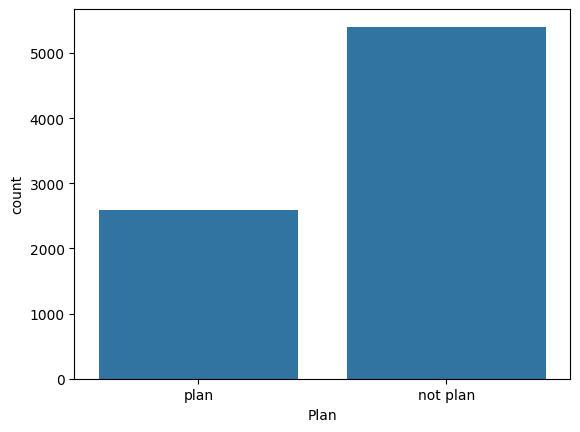

In [7]:
# Statistik deskriptif
print(df.describe())

# Visualisasi distribusi kolom numerik
numerical = ['Parent_income', 'IQ', 'Encourage']
for col in numerical:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Visualisasi distribusi kolom kategorikal
categorical = ['Gender', 'Plan']
for col in categorical:
    sns.countplot(x=col, data=df)
    plt.show()


Encoding Data Kategorikal

In [8]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Encourage'] = le.fit_transform(df['Encourage'])
df['Plan'] = le.fit_transform(df['Plan'])


Analisis Korelasi Antar Fitur

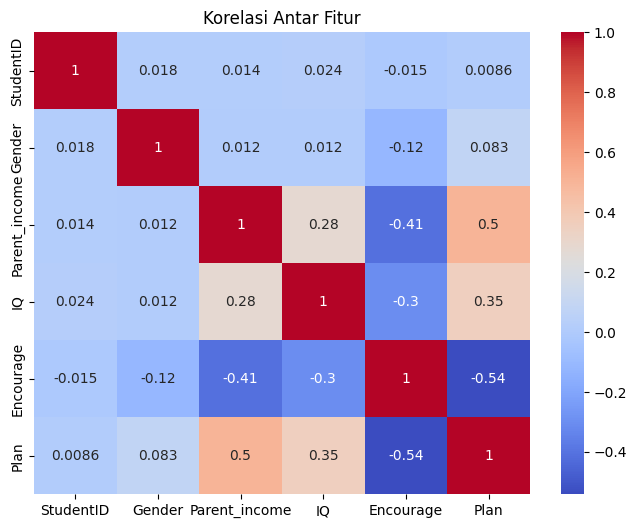

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

Splitting Data

In [10]:
# Tahap 7: Splitting Data
X = df[['Gender', 'Parent_income', 'IQ', 'Encourage']]  # fitur
y = df['Plan']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Evaluasi Model Decision Tree

In [14]:
# Build Decision Tree
#model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='gini')
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print(f"Akurasi Model: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi Model: 85.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1093
           1       0.82      0.68      0.74       507

    accuracy                           0.85      1600
   macro avg       0.84      0.80      0.82      1600
weighted avg       0.85      0.85      0.85      1600

Confusion Matrix:
 [[1019   74]
 [ 164  343]]


In [15]:
print(model)

DecisionTreeClassifier(max_depth=3, random_state=42)


Visualisasi Hasil Model

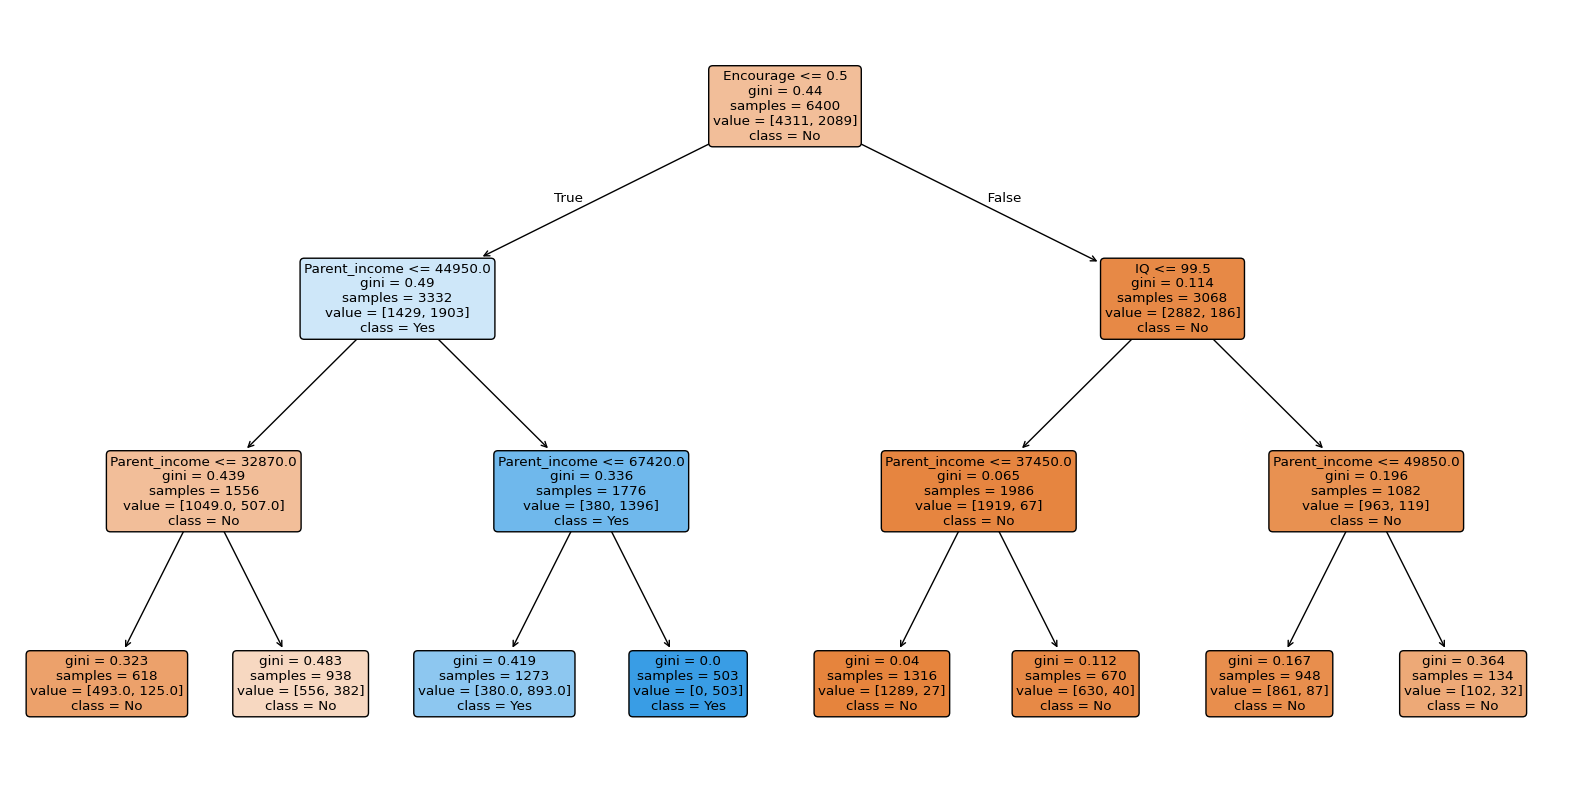

In [16]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True, rounded=True, max_depth=4)
plt.show()


Feature Importance

           Fitur  Importance
3      Encourage    0.643396
1  Parent_income    0.350311
2             IQ    0.006293
0         Gender    0.000000


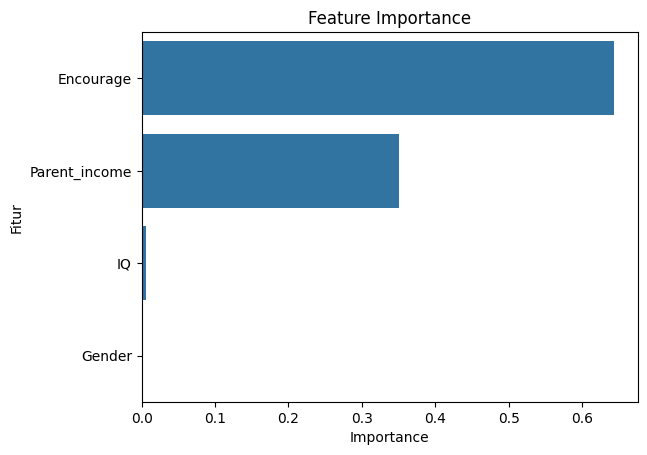

In [17]:
feat_importance = pd.DataFrame({'Fitur': X.columns, 'Importance': model.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
print(feat_importance)

# Visualisasi
sns.barplot(x='Importance', y='Fitur', data=feat_importance)
plt.title('Feature Importance')
plt.show()

Hyperparameter Tuning (max_depth)

In [18]:
best_acc = 0
best_depth = None
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"max_depth={depth}, Accuracy={acc}")
    if acc > best_acc:
        best_acc = acc
        best_depth = depth

print(f"Max Depth Terbaik: {best_depth}, dengan Accuracy: {best_acc}")

max_depth=1, Accuracy=0.74625
max_depth=2, Accuracy=0.85125
max_depth=3, Accuracy=0.85125
max_depth=4, Accuracy=0.85125
max_depth=5, Accuracy=0.85125
max_depth=6, Accuracy=0.85
max_depth=7, Accuracy=0.845
max_depth=8, Accuracy=0.84875
max_depth=9, Accuracy=0.831875
max_depth=10, Accuracy=0.82625
Max Depth Terbaik: 2, dengan Accuracy: 0.85125


Praktikum Mandiri-Dataset Satelit

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum07/data/dataset_satelit.csv')

# Cetak header data (5 baris pertama) dari file
display(df.head())

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

Statistik Deskriptif

In [21]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [22]:
df.columns

Index(['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'],
      dtype='object')

In [24]:
#mengubah kolom mg menjadi float
df['Mg'] = pd.to_numeric(df['Mg'], errors='coerce')

#hilangkan baris yang punya missing value
df = df.dropna()

In [25]:
#pemilihan fitur dengan semua kolom
X = df[['P', 'K', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn', 'B',
            'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
            'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
            'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']]
y = df['N']

In [26]:
#spiliting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
#training model
model = LinearRegression()

#training data
model.fit(X_train, y_train)

LinearRegression()

Evaluasi Model-Menggunakan semua fitur kolom

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

#testing
y_pred = model.predict(X_test)

#evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("RMSE:", rmse)

R2 Score: 0.7549955124484078
RMSE: 0.19392193397227142


Informasi koefisien dengan semua fitur kolom

In [34]:
coeff = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_
})

print(coeff)

        Fitur  Koefisien
0           P   8.570837
1           K   0.056014
2          Ca  -0.058380
3          Mg  -0.161095
4          Fe   0.000284
5          Mn   0.000177
6          Cu   0.023202
7          Zn   0.002968
8           B  -0.002092
9         b12   0.327312
10        b11  -0.619437
11         b9  -0.047586
12        b8a   0.064453
13         b8  -0.072659
14         b7   0.981186
15         b6  -0.864947
16         b5  -0.329397
17         b4   1.420614
18         b3  -0.449043
19         b2  -0.357454
20         b1  -0.033418
21   Sigma_VV   0.156595
22   Sigma_VH  -1.466200
23       plia   0.021315
24        lia  -0.021906
25       iafe  -0.078122
26  gamma0_vv   0.457327
27  gamma0_vh   2.946416
28   beta0_vv  -0.569281
29   beta0_vh  -0.677599


Hasil summary memakai semua fitur kolom

In [38]:
X_sm = sm.add_constant(X)           # tambahkan konstanta (intercept)
model_ols = sm.OLS(y, X_sm).fit()   # buat model Ordinary Least Squares
print(model_ols.summary())          # tampilkan ringkasan hasil regresi

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     66.10
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          6.69e-163
Time:                        15:17:56   Log-Likelihood:                 156.68
No. Observations:                 592   AIC:                            -251.4
Df Residuals:                     561   BIC:                            -115.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8681      0.864      4.479      0.0

Visualisasi hasil prediksi vs aktual

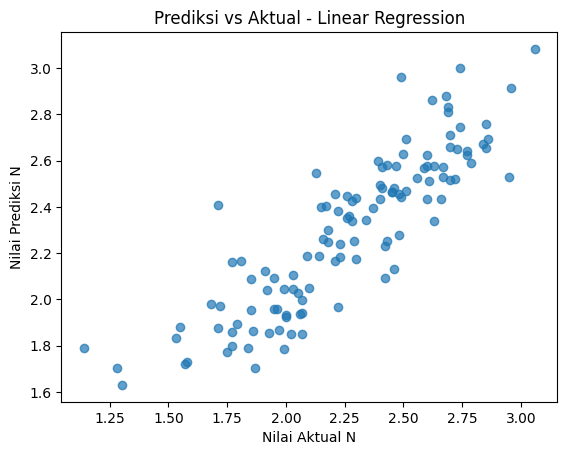

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Nilai Aktual N")
plt.ylabel("Nilai Prediksi N")
plt.title("Prediksi vs Aktual - Linear Regression")
plt.show()

Tampilkan fitur paling berpengaruh (koefisien terbesar)

In [40]:
coef = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_
}).sort_values(by='Koefisien', ascending=False)
print(coef)

        Fitur  Koefisien
0           P   8.570837
27  gamma0_vh   2.946416
17         b4   1.420614
14         b7   0.981186
26  gamma0_vv   0.457327
9         b12   0.327312
21   Sigma_VV   0.156595
12        b8a   0.064453
1           K   0.056014
6          Cu   0.023202
23       plia   0.021315
7          Zn   0.002968
4          Fe   0.000284
5          Mn   0.000177
8           B  -0.002092
24        lia  -0.021906
20         b1  -0.033418
11         b9  -0.047586
2          Ca  -0.058380
13         b8  -0.072659
25       iafe  -0.078122
3          Mg  -0.161095
16         b5  -0.329397
19         b2  -0.357454
18         b3  -0.449043
28   beta0_vv  -0.569281
10        b11  -0.619437
29   beta0_vh  -0.677599
15         b6  -0.864947
22   Sigma_VH  -1.466200
